# Manipulating and Visualizing Data

We've learned the basics of [Loading files](files.md) and now it's time to reorganize the loaded data into commonly-used data structures from [NumPy](http://www.numpy.org/) and [Pandas](http://pandas.pydata.org/). To motivate the various data structures, we're going to feed them into [matplotlib](https://matplotlib.org/) for visualization. This lecture-lab is then all about steps 2, 3, and 5 from our generic analytics program template:

1. Acquire data, which means finding a suitable file or collecting data from the web and storing in a file
2. Load data from disk and place into memory **organized into data structures**
3. Normalize, clean, or otherwise **prepare data**
4. Process the data, which can mean training a machine learning model, computing summary statistics, or optimizing a cost function
5. Emit results, which can be anything from simply printing an answer to saving data to the disk to generating a fancy **visualization**

You'll learn more about step 4 in the courses on machine learning, timeseries analysis, and so on.

TODO: missing values
	delete row
	insert value
    
Let's get started by importing all of the packages we're going to need and setting a few parameters that make this Jupyter notebook look better:

In [60]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

# jupyter notebook command (ignore)
%matplotlib inline

pandas.options.display.max_rows = 7 # Don't display too much data (Pandas)
np.set_printoptions(threshold=4)    # Don't display too much data (NumPy)

## Your new BFFs

Analytics programs tend to use lots of one- and two-dimensional arrays. 2D arrays are matrices and tables of data. 1D arrays are vectors, such as points in Euclidean space. A column or row of a table is also a 1D array. Python has lists and lists of lists that would suffice for 1D and 2D arrays, but Pandas and NumPy define similar but more capable data structures.

Let's start with Pandas *data frames*, which are powerful tables very much like Excel tables. I also think that Pandas' `read_csv()` is the easiest way to load most kinds of data organized into rows and columns. Here's a sample data file with a list of prices over time, one data point per line and no header row:

In [61]:
! wc data/prices.txt
! head data/prices.txt

     345     345    2067 data/prices.txt
0.605
0.600
0.594
0.592
0.600
0.616
0.623
0.628
0.630
0.629


(The `wc` and `head` are bash commands that you might find useful in the future.)

Here's how to load that file using Pandas:

In [62]:
prices = pandas.read_csv('data/prices.txt', header=None)
prices # jupyter notebooks know how to display this nicely

,0
0,0.605
1,0.600
2,0.594
...,...
342,1.939
343,1.898
344,1.891


The numbers in the left column are just the index and are displayed by Pandas for your information; they are not stored in memory as part of the data structure. Let's look at the type and shape of this data structure:

In [63]:
print "type is", type(prices)
print "shape is", prices.shape

type is <class 'pandas.core.frame.DataFrame'>
shape is (345, 1)


That output indicates that the data is stored in a `DataFrame` object and there are 344 rows and one column.

While Pandas is great for loading the data, and a few other things we'll see below, I prefer working with NumPy arrays; the actual type is called `ndarray`. Let's convert that list of prices from a data frame to a NumPy array:

In [64]:
m = prices.as_matrix()     # Convert data frame to numpy array
print "type is", type(m)
print "shape is", m.shape
print m

type is <type 'numpy.ndarray'>
shape is (345, 1)
[[ 0.605]
 [ 0.6  ]
 [ 0.594]
 ..., 
 [ 1.939]
 [ 1.898]
 [ 1.891]]


<img src="images/redbang.png" style="width:30px" align="left">The printed array looks like a list of lists but it is a different data type. Just because two data structures print out in the same way, doesn't mean that they are the same kinds of objects.

We can access the 2D NumPy arrays using array index notation *array*`[`*row*, *column*`]`:

In [65]:
print m[0]        # Access the first row
print m[0,0]      # Access the first column of the first row
print m[1]        # Access the 2nd row
print m[1,0]      # Access the first column of the 2nd row

[ 0.605]
0.605
[ 0.6]
0.6


That is a little weird though. We think of that as a 1D array or just a list, not a 2D array with a single column (shape is 345 x 1). To get NumPy to treat that as 1D, we use the `shape` attribute of the array:

In [66]:
m.shape = (345,)   # len(m)==345
m

array([ 0.605,  0.6  ,  0.594, ...,  1.939,  1.898,  1.891])

Now, we can access the elements using a single index as we would expect:

In [67]:
print m[0]
print m[1]
print m[2]

0.605
0.6
0.594


A shape with an empty second parameter indicates a 1D array, which is how NumPy converts a regular Python list to an array:

In [68]:
sizes = [28, 32, 34, 36, 38, 39, 40, 41] # Plain old Python list
a = np.array(sizes)                      # Convert to NumPy array
print "shape is", a.shape
a

shape is (8,)


array([28, 32, 34, ..., 39, 40, 41])

While we're at it, here's how to convert a list of lists to a 2D NumPy array:

In [69]:
stuff = [
    [ 18, 8, 307, 3504],
    [ 15, 8, 350, 3693],
    [ 18, 8, 318, 3436]
]
m = np.array(stuff)
print "shape is", m.shape
m

shape is (3, 4)


array([[  18,    8,  307, 3504],
       [  15,    8,  350, 3693],
       [  18,    8,  318, 3436]])

Now multiple indices make sense. For example, to access the element containing value 3436, we'd use `m[2,3]` (3rd row, 4th column).

## Types matter

*TODO*: show `x+y` could be string, int, float, list, or numpy array. overloaded operators. e.g., x*y could be a string if x is string and y is int



In [70]:
import numpy as np
def f(x):
    "Scalar or vector math!"
    return np.cos(3 * np.pi * x) / x

print f(3.4)
X = np.array([1.2,3.0]) # a numpy array is more flexible than list of numbers
print f(X)              # returns array due to vector math in f()!
print [f(x) for x in X] # manually apply f() to X

0.237946174816
[ 0.25751416 -0.33333333]
[0.25751416197912252, -0.33333333333333331]


## Plotting Time Series Data

Our list of prices is representative of timeseries data, such as stock price, temperature, or population fluctuations. Matplotlib is a great library for visualizing data and in this section we're going to use it to display the prices as a timeseries using `plot()`. That function takes the X and Y coordinates as separate arrays.

I find Matplotlib kind of mysterious, but I have learned patterns that I use over and over again, such as this timeseries plot.

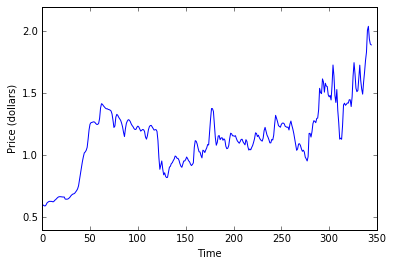

In [71]:
m = prices.as_matrix()           # Let's convert pandas data frame to numpy array
time = np.arange(0, len(m), 1)   # Time axis goes from 0 to len(m) by 1
#plt.figure(figsize=(5, 2))       # Prepare a plot 5x2 inches
plt.plot(time, m)                # Plot time vs the prices data
plt.xlabel("Time")               # Always set the axes labels
plt.ylabel("Price (dollars)")
plt.show()                       # Show the actual plot

**Plotting functions**

Sometimes we have a smooth function such as a cosine that we'd like to plot.  To do that, we need to sample the function at regular intervals to collect a list of Y coordinates (like prices from before).  Let's start by defining the function that maps X coordinates to Y values and then get a sample of X values at regular intervals between 0.1 and 1.1, stepping by 0.01:

In [72]:
def f(x):
    return np.cos(3 * np.pi * x) / x

X = np.arange(.1, 1.1, 0.01) # from .1 to 1.1 by step 0.01 

There are three ways to sample the function `f()` at the coordinates contained in X, which I've delineated here. All of these 3 methods employ our Map pattern:

In [73]:
# Get f(x) values for all x in three different ways
# Option 1: (non-Pythonic)
Y = [] 
for x in X:
    Y.append(f(x))

# Option 2: Pythonic way (cool kids do this)
Y = [f(x) for x in X]

# Option 3: Data science way (the most popular kids do this)
Y = f(X)  # a so-called broadcast; implied map

print X
print Y

[ 0.1   0.11  0.12 ...,  1.07  1.08  1.09]
[ 5.87785252  4.62764923  3.54816076 ..., -0.73846263 -0.67497095
 -0.60670813]


Given X and Y coordinates, we can plot the function:

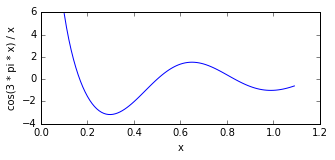

In [74]:
plt.figure(figsize=(5, 2))

plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("cos(3 * pi * x) / x")
plt.show()

##  Visualizing the relationship between variables

Let's move beyond one dimensional arrays now to 2D arrays and plot one column versus another.  Here is some sample car data (with a header row) with columns for miles per gallon, number of cylinders, engine horsepower, and weight in pounds:

In [75]:
! head data/cars.csv

MPG,CYL,ENG,WGT
18,8,307,3504
15,8,350,3693
18,8,318,3436
16,8,304,3433
17,8,302,3449
15,8,429,4341
14,8,454,4354
14,8,440,4312
14,8,455,4425


We can use Pandas again to load the data into a data frame and then convert to a NumPy 2D array (a matrix):

In [76]:
cars = pandas.read_csv('data/cars.csv')
print "shape is", cars.shape
cars

shape is (392, 4)


,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
...,...,...,...,...
389,32.0,4,135.0,2295
390,28.0,4,120.0,2625
391,31.0,4,119.0,2720


In [77]:
m = cars.as_matrix()
print "shape is", m.shape
m

shape is (392, 4)


array([[   18.,     8.,   307.,  3504.],
       [   15.,     8.,   350.,  3693.],
       [   18.,     8.,   318.,  3436.],
       ..., 
       [   32.,     4.,   135.,  2295.],
       [   28.,     4.,   120.,  2625.],
       [   31.,     4.,   119.,  2720.]])

Let's say we're interested in the relationship between the weight of the car and the fuel efficiency. We can examine that relationship visually by plotting weight against efficiency using a scatterplot. 

This brings us to the question of how to extract columns from numpy arrays, where each column represents the data associated with one attribute of all cars. The idea is to fix the column number but use a *wildcard* (the colon character) to indicate we want all rows:

In [78]:
# can do this:
print cars.MPG
print cars['MPG']

# but I like as numpy matrix
mpg = m[:,0]
wgt = m[:,3]
print "shape is", mpg.shape
mpg

0      18.0
1      15.0
2      18.0
       ... 
389    32.0
390    28.0
391    31.0
Name: MPG, dtype: float64
0      18.0
1      15.0
2      18.0
       ... 
389    32.0
390    28.0
391    31.0
Name: MPG, dtype: float64
shape is (392,)


array([ 18.,  15.,  18., ...,  32.,  28.,  31.])

Once we have the two columns, we can use matplotlib's `scatter()` function:

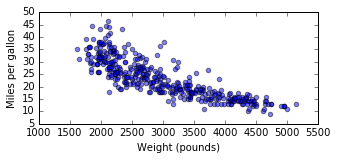

In [79]:
plt.figure(figsize=(5, 2))
plt.scatter(wgt, mpg, alpha=0.5) # looks cooler with alpha (opacity) at 50%
plt.xlabel('Weight (pounds)')
plt.ylabel('Miles per gallon')
plt.show()

Great! This shows a clear relationship between weight and efficiency: the heavier the car, the lower the efficiency.

It would also be interesting to know how the number of engine cylinders is related to weight and efficiency. We could go to a three-dimensional graph or even multiple graphs, but it's better to add another attribute to a single graph in this case. We could change the color according to the number of cylinders, but a better visualization would change the size of the plotted point.

We can pull out the number of cylinders with `m[:,1]` like we did before, but we need to plot each point individually now because we have to specify different sizes. That means we need a loop around `scatter()` to pass individual X and Y coordinates rather than a list. The `s` parameter to `scatter()` is actually proportional to the area of the circle we want (see [pyplot scatter plot marker size](https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size)). To accentuate the difference between engine size, I scale by .7. Here is the code to illustrate the relationship between three variables:


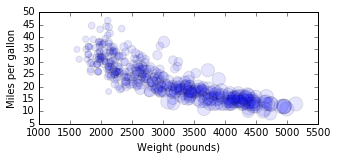

In [80]:
plt.figure(figsize=(5, 2))
hp = m[:,2]
plt.scatter(wgt, mpg, s=hp*.5, alpha=0.1)
plt.xlabel('Weight (pounds)')
plt.ylabel('Miles per gallon')
plt.show()

When exploring data, it's often useful to know the unique set of values. For example, if would like to know the set of number of cylinders, we can use `set(`*mylist*`)`:

In [81]:
m = cars.as_matrix()
cyl = m[:,1]
print set(cyl)

set([8.0, 3.0, 4.0, 5.0, 6.0])


Interesting. I did not know there were cars with 3 cylinders.

**Exercise**: Convert `cyl` to a set of integers (not floating-point values) using a map pattern. Hint: `int(3.0)` gives 3.

## Histograms

Instead of just a unique set of attribute values, we can count how many of each unique value appear in a data set. Python's `Counter` object, a kind of `dict`, knows how to count the elements. For example, here is how we'd get a dictionary-like object mapping number of cylinders to number of cars with that many cylinders:

In [82]:
from collections import Counter
m = cars.as_matrix()
cyl = m[:,1]
Counter(cyl)

Counter({3.0: 4, 4.0: 199, 5.0: 3, 6.0: 83, 8.0: 103})

That works great for categorical variables, which the number of cylinders kind of is, but `Counter` is not as appropriate for numerical values. Besides, looking at the cylinder counts, it's hard to quickly understand the relative populations. Visualizing the data with a *histogram* is a much better idea and works for numerical values too. Here is the code to make a histogram of the cylinder attribute:

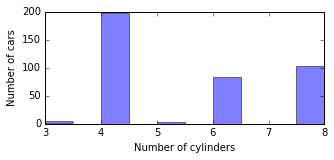

In [83]:
plt.figure(figsize=(5, 2))
plt.hist(cyl, alpha=0.5)
plt.xlabel('Number of cylinders')
plt.ylabel('Number of cars')
plt.show()

The same pattern gives us a histogram for numerical data as well:

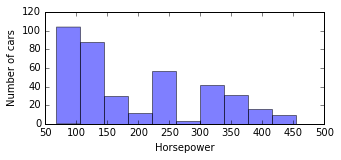

In [84]:
m = cars.as_matrix()
hp = m[:,2]
plt.figure(figsize=(5, 2))
plt.hist(hp, alpha=0.5)
plt.xlabel('Horsepower')
plt.ylabel('Number of cars')
plt.show()

A histogram is really a chunky estimate of a variable's density function and so it's often useful to normalize the histogram so that the area integrates (sums) to 1. To get a normalized histogram, use argument `normed=True`:

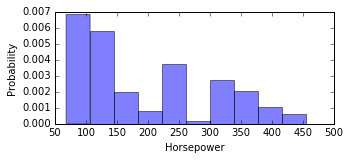

In [85]:
plt.figure(figsize=(5, 2))
n, bins, patches = plt.hist(hp, normed=True, alpha=0.5)
plt.xlabel('Horsepower')
plt.ylabel('Probability')
plt.show()

Note that it is not the sum of the heights of the bins that equals 1; it is the height * binwidth summed that equals 1. 

## Slicing and dicing

So far, all of the data we've loaded has been numerical but it's very common to load categorical or textual variables in the form of strings. Pandas data frames are very useful in this case. Let's load some sample sales data that has three string columns:

In [86]:
sales = pandas.read_csv('data/sales-small.csv')
sales

,Date,Quantity,Unit Price,Shipping,Customer Name,Product Category,Product Name
0,10/13/10,6,38.94,35.00,Muhammed MacIntyre,Office Supplies,"Eldon Base for stackable storage shelf, platinum"
1,10/1/12,49,208.16,68.02,Barry French,Office Supplies,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
2,10/1/12,27,8.69,2.99,Barry French,Office Supplies,"Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl"
...,...,...,...,...,...,...,...
28,11/8/10,28,13.48,4.51,Carlos Soltero,Office Supplies,Tenex Personal Project File with Scoop Front D...
29,10/21/12,49,6.08,1.17,Grant Carroll,Office Supplies,Col-Erase� Pencils with Erasers
30,1/1/11,10,5.98,4.38,Don Miller,Technology,"Imation 3.5"" DS/HD IBM Formatted Diskettes, 10..."


The nice thing about the data frames is that we can access the columns by name, using either *table*`.`*attribute* or array indexing notation *table*`[` *attribute* `]`:

In [87]:
sales.Date

0     10/13/10
1      10/1/12
2      10/1/12
        ...   
28     11/8/10
29    10/21/12
30      1/1/11
Name: Date, dtype: object

In [88]:
sales['Date']

0     10/13/10
1      10/1/12
2      10/1/12
        ...   
28     11/8/10
29    10/21/12
30      1/1/11
Name: Date, dtype: object

In [89]:
sales['Customer Name']

0     Muhammed MacIntyre
1           Barry French
2           Barry French
             ...        
28        Carlos Soltero
29         Grant Carroll
30            Don Miller
Name: Customer Name, dtype: object

Accessing rows via `sales[0]` then doesn't work because Pandas wants to use array indexing notation for getting columns. Instead, we have to use slightly more awkward notation:

In [90]:
sales.iloc[0]  # get first row of data

Date                                                        10/13/10
Quantity                                                           6
Unit Price                                                     38.94
Shipping                                                          35
Customer Name                                     Muhammed MacIntyre
Product Category                                     Office Supplies
Product Name        Eldon Base for stackable storage shelf, platinum
Name: 0, dtype: object

To get individual elements, we can use regular list of lists Python notation after the `loc`:

In [91]:
print sales.iloc[0][0], sales.iloc[0][1], sales.iloc[0][2]

10/13/10 6 38.94


During construction and debugging of software, I often like the explicit printing of the column names as is the default shown above. On the other hand, if we need the elements as a plain old Python list, we can do that with `list()`:

In [92]:
row = list(sales.iloc[0])
print row

['10/13/10', 6, 38.939999999999998, 35.0, 'Muhammed MacIntyre', 'Office Supplies', 'Eldon Base for stackable storage shelf, platinum']


**Exercise**: Convert all rows of `sales` to a list of lists. Hint: use the map pattern and `list()`.

The task of that exercise is common enough that Pandas provides a conversion mechanism directly:

In [93]:
m = sales.as_matrix()
print "Type is", type(m)
print m[0] # get first row

Type is <type 'numpy.ndarray'>
['10/13/10' 6 38.94 ..., 'Muhammed MacIntyre' 'Office Supplies'
 'Eldon Base for stackable storage shelf, platinum']


We can still get the columns individually using the wildcard notation we saw before:

In [94]:
m[:,0] # get first column

array(['10/13/10', '10/1/12', '10/1/12', ..., '11/8/10', '10/21/12',
       '1/1/11'], dtype=object)

In [95]:
m[:,4] # get fifth column

array(['Muhammed MacIntyre', 'Barry French', 'Barry French', ...,
       'Carlos Soltero', 'Grant Carroll', 'Don Miller'], dtype=object)

### Pulling data frames apart

For machine learning, we often want to separate out one of the columns as the dependent variable, keeping the others as a group of independent variables.  Notation we typically use is X -> Y, meaning the set of observations in X predict or classify results in Y. 

For example, let's say we wanted to predict engine size given the efficiency, number of cylinders, and overall car weight. We need to separate out the engine size as Y and combining the other columns into X. Using Pandas, we can easily separate the variables and keep the variables names:

In [96]:
cars = pandas.read_csv('data/cars.csv')
Y = cars['ENG']
X = cars[['MPG','CYL','WGT']]
print X
print
print Y

      MPG  CYL   WGT
0    18.0    8  3504
1    15.0    8  3693
2    18.0    8  3436
..    ...  ...   ...
389  32.0    4  2295
390  28.0    4  2625
391  31.0    4  2720

[392 rows x 3 columns]

0      307.0
1      350.0
2      318.0
       ...  
389    135.0
390    120.0
391    119.0
Name: ENG, dtype: float64


Converting to a NumPy array strips away the column names but let us treat it as a matrix, which is handy in a lot of cases (e.g., matrix addition). Separating columns from NumPy arrays is a bit more cumbersome, However:

In [97]:
m = cars.as_matrix()
Y = m[:,2]
X = np.column_stack((m[:,0],m[:,1], m[:,3])) # note extra parens; it's a tuple of columns
print X
print
print Y

[[   18.     8.  3504.]
 [   15.     8.  3693.]
 [   18.     8.  3436.]
 ..., 
 [   32.     4.  2295.]
 [   28.     4.  2625.]
 [   31.     4.  2720.]]

[ 307.  350.  318. ...,  135.  120.  119.]


While NumPy arrays are more cumbersome when pulling apart tables, accessing the elements without `loc` is usually more convenient:

In [98]:
print cars.iloc[0][1]
print m[0,1]

8.0
8.0


## Mixed, missing data

Using tips from [Jeremy Howard](https://www.usfca.edu/data-institute/about-us/researchers) here on real-world data clean up.

### Load and parse dates

In [99]:
import pandas
df = pandas.read_csv("data/mixed.csv", parse_dates=['Date'])
df

,Date,Description,Size,Price,Topic
0,2017-06-20,NaN,92.0,1.50,News
1,2017-06-21,run forest,42.0,2.34,Sports
2,2017-06-21,not your droids,19.0,0.88,Sports
3,2017-06-22,hi mom,NaN,9.30,Politics
4,2017-06-23,foo&bar,1.0,10.00,NaN
5,2017-06-24,get off my lawn,99.0,8.90,Sci


If you ever need to convert dates to the elapsed time, you can convert the date timestamp to UNIX time, the number of second since 1970:

In [146]:
d = df['Date']
delta = d - pandas.datetime(1970,1,1)
delta

0   17337 days
1   17338 days
2   17338 days
3   17339 days
4   17340 days
5   17341 days
Name: Date, dtype: timedelta64[ns]

In [147]:
df3 = df.copy()
df3['Date'] = delta.dt.total_seconds()
df3

,Date,Description,Size,Price,Topic,Size_na
0,1.497917e+09,NaN,92.0,1.50,2,False
1,1.498003e+09,run forest,42.0,2.34,5,False
2,1.498003e+09,not your droids,19.0,0.88,5,False
3,1.498090e+09,hi mom,42.0,9.30,3,True
4,1.498176e+09,foo&bar,1.0,10.00,1,False
5,1.498262e+09,get off my lawn,99.0,8.90,4,False


Or, you can convert the timestamp into the number of days since 1970:

In [150]:
delta.dt.days

0    17337
1    17338
2    17338
3    17339
4    17340
5    17341
Name: Date, dtype: int64

### String to categorical variable

Here is how we convert a column to a categorical variable:

In [100]:
df['Topic'] = df['Topic'].astype('category')
df

,Date,Description,Size,Price,Topic
0,2017-06-20,NaN,92.0,1.50,News
1,2017-06-21,run forest,42.0,2.34,Sports
2,2017-06-21,not your droids,19.0,0.88,Sports
3,2017-06-22,hi mom,NaN,9.30,Politics
4,2017-06-23,foo&bar,1.0,10.00,NaN
5,2017-06-24,get off my lawn,99.0,8.90,Sci


In [101]:
print df['Topic'].cat.categories  # .cat field gives us access to categories stuff

Index([u'News', u'Politics', u'Sci', u'Sports'], dtype='object')


In [102]:
print df['Topic'].cat.codes

0    0
1    3
2    3
3    1
4   -1
5    2
dtype: int8


In [103]:
print df['Topic'].cat.as_ordered()

0        News
1      Sports
2      Sports
3    Politics
4         NaN
5         Sci
dtype: category
Categories (4, object): [News < Politics < Sci < Sports]


### String to ordinal

We can convert that category to an integer if we like:

In [114]:
# make sure you convert to categorical first
df['Topic'] = df['Topic'].astype('category')
df['Topic'] = df['Topic'].cat.codes+1 # add one so NA (-1) becomes 0
df

,Date,Description,Size,Price,Topic,Size_na
0,2017-06-20,NaN,92.0,1.50,2,False
1,2017-06-21,run forest,42.0,2.34,5,False
2,2017-06-21,not your droids,19.0,0.88,5,False
3,2017-06-22,hi mom,42.0,9.30,3,True
4,2017-06-23,foo&bar,1.0,10.00,1,False
5,2017-06-24,get off my lawn,99.0,8.90,4,False


### Missing data

Our data has a missing description, which we can ignore, but also has a missing size (numeric) and topic (categorical) entry. 

* If the element is numeric, we replace the missing value with the column median and add a column to indicate 0 or 1 as to whether the value is missing.
* If the element is categorical, Pandas can handle the missing value automatically when we use parameter `dummy_na=True` on `get_dummies()` (see next section).

Let's convert the missing numeric data:

In [105]:
pandas.isnull(df['Size'])

0    False
1    False
2    False
3     True
4    False
5    False
Name: Size, dtype: bool

In [106]:
df['Size_na'] = pandas.isnull(df['Size'])
df

,Date,Description,Size,Price,Topic,Size_na
0,2017-06-20,NaN,92.0,1.50,1,False
1,2017-06-21,run forest,42.0,2.34,4,False
2,2017-06-21,not your droids,19.0,0.88,4,False
3,2017-06-22,hi mom,NaN,9.30,2,True
4,2017-06-23,foo&bar,1.0,10.00,0,False
5,2017-06-24,get off my lawn,99.0,8.90,3,False


In [107]:
szcol = df['Size']
df['Size'] = szcol.fillna(szcol.median())
df

,Date,Description,Size,Price,Topic,Size_na
0,2017-06-20,NaN,92.0,1.50,1,False
1,2017-06-21,run forest,42.0,2.34,4,False
2,2017-06-21,not your droids,19.0,0.88,4,False
3,2017-06-22,hi mom,42.0,9.30,2,True
4,2017-06-23,foo&bar,1.0,10.00,0,False
5,2017-06-24,get off my lawn,99.0,8.90,3,False


### Dummy variables

Instead, we can convert the categorical variable to dummy variables, also called "*one hot encoding*."

If were lazy, we can just convert everything to dummies but the `Description` field is not something that we need to convert as it is mostly just information we are carrying along.

In [108]:
pandas.get_dummies(df) # convert all categorical to dummies

,Date,Size,Price,Topic,Size_na,Description_foo&bar,Description_get off my lawn,Description_hi mom,Description_not your droids,Description_run forest
0,2017-06-20,92.0,1.50,1,False,0.0,0.0,0.0,0.0,0.0
1,2017-06-21,42.0,2.34,4,False,0.0,0.0,0.0,0.0,1.0
2,2017-06-21,19.0,0.88,4,False,0.0,0.0,0.0,1.0,0.0
3,2017-06-22,42.0,9.30,2,True,0.0,0.0,1.0,0.0,0.0
4,2017-06-23,1.0,10.00,0,False,1.0,0.0,0.0,0.0,0.0
5,2017-06-24,99.0,8.90,3,False,0.0,1.0,0.0,0.0,0.0


In [109]:
pandas.get_dummies(df['Topic']) # One column's dummies

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0


In [110]:
pandas.get_dummies(df['Topic'], dummy_na=True) # Add an "na" column

,0.0,1.0,2.0,3.0,4.0,nan
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0


We can manually pack these new columns into the old data frame and delete the old column:

In [119]:
df2 = pandas.concat([df,pandas.get_dummies(df['Topic'], dummy_na=True)], axis=1)
df2.drop('Topic', axis=1, inplace=True) # Considered better than del df2['Topic'] I think
df2

,Date,Description,Size,Price,Size_na,1.0,2.0,3.0,4.0,5.0,nan
0,2017-06-20,NaN,92.0,1.50,False,0.0,1.0,0.0,0.0,0.0,0.0
1,2017-06-21,run forest,42.0,2.34,False,0.0,0.0,0.0,0.0,1.0,0.0
2,2017-06-21,not your droids,19.0,0.88,False,0.0,0.0,0.0,0.0,1.0,0.0
3,2017-06-22,hi mom,42.0,9.30,True,0.0,0.0,1.0,0.0,0.0,0.0
4,2017-06-23,foo&bar,1.0,10.00,False,1.0,0.0,0.0,0.0,0.0,0.0
5,2017-06-24,get off my lawn,99.0,8.90,False,0.0,0.0,0.0,1.0,0.0,0.0


Or, we can do it the easy way by just specifying the columns to convert:

In [112]:
pandas.get_dummies(df, columns=['Topic'], dummy_na=True) # The easy way

,Date,Description,Size,Price,Size_na,Topic_0.0,Topic_1.0,Topic_2.0,Topic_3.0,Topic_4.0,Topic_nan
0,2017-06-20,NaN,92.0,1.50,False,0.0,1.0,0.0,0.0,0.0,0.0
1,2017-06-21,run forest,42.0,2.34,False,0.0,0.0,0.0,0.0,1.0,0.0
2,2017-06-21,not your droids,19.0,0.88,False,0.0,0.0,0.0,0.0,1.0,0.0
3,2017-06-22,hi mom,42.0,9.30,True,0.0,0.0,1.0,0.0,0.0,0.0
4,2017-06-23,foo&bar,1.0,10.00,False,1.0,0.0,0.0,0.0,0.0,0.0
5,2017-06-24,get off my lawn,99.0,8.90,False,0.0,0.0,0.0,1.0,0.0,0.0


If you ever need to walk the columns in your data frame, you can do that with a for each loop:

In [113]:
# walk columns; col is the actual series
for name,col in df.iteritems():
    print name

Date
Description
Size
Price
Topic
Size_na


In [116]:
df.describe() # useful stats about columns

,Size,Price,Topic
count,6.000000,6.000000,6.000000
mean,49.166667,5.486667,3.333333
std,39.117345,4.326175,1.632993
...,...,...,...
50%,42.000000,5.620000,3.500000
75%,79.500000,9.200000,4.750000
max,99.000000,10.000000,5.000000


## Summary

In this lecture, you've learned the basics of loading and manipulating data:

* Loading data into Pandas data frames using `read_csv()`
* Converting data frames to NumPy arrays using `as_matrix()`
* Extracting columns with *dataframe*`.`*columnname* or *matrix*`[:,`*columnindex*`]`
* Accessing elements via *dataframe*`.iloc[`rowindex`][`*columnindex*`]` or *matrix*`[`*rowindex*`,`*columnindex*`]`
* Getting unique elements with `set(`*mylist*`)`

And, you've learned how to visualize:

* Time series data
* Functions over a given range
* The relationship between variables using a scatterplot
* Histograms approximating density function